Import all the necessary libraries from tensorflow,sklearn

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from tensorflow.keras.regularizers import l2

<h4 color='black'>Load the dataset From tensorflow dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()



170498071/170498071 [==============================] - 3s 0us/step


Analyize the shape of training and test data

In [ ]:
print(X_train.shape)
y_train.shape

(50000, 32, 32, 3)


(50000, 1)

split train dataset into train,valid dataset

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
   X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_valid.shape)
y_valid.shape

(5000, 32, 32, 3)


(5000, 1)

In [ ]:
print(X_test.shape)
y_test.shape

(10000, 32, 32, 3)


(10000, 1)

There are 50000 training images and 10000 test images

In [ ]:
y_train = y_train.reshape(-1,)
y_valid=y_valid.reshape(-1,)
y_train[:5]

array([3, 1, 0, 3, 2], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_Images(X, y, index):
    plt.figure(figsize = (5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plotting some training images

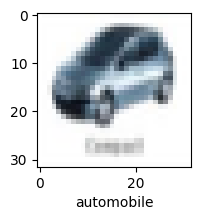

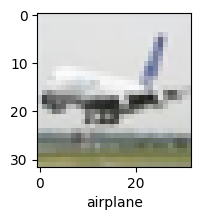

In [ ]:
for i in range(1,3):
   plot_Images(X_train, y_train, i)



<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid=X_valid/255.0

<h4 style="color:"> Building a custom convolutional neural network to train our images</h4>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu',kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(4096, activation='relu',kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/50
704/704 [==============================] - 19s 17ms/step - loss: 4.9235 - accuracy: 0.3186 - val_loss: 2.6892 - val_accuracy: 0.3944
Epoch 2/50
704/704 [==============================] - 10s 14ms/step - loss: 2.3417 - accuracy: 0.4184 - val_loss: 2.2167 - val_accuracy: 0.4330
Epoch 3/50
704/704 [==============================] - 10s 14ms/step - loss: 2.0650 - accuracy: 0.4645 - val_loss: 2.0261 - val_accuracy: 0.3996
Epoch 4/50
704/704 [==============================] - 9s 13ms/step - loss: 1.8365 - accuracy: 0.5008 - val_loss: 1.6681 - val_accuracy: 0.5194
Epoch 5/50
704/704 [==============================] - 9s 13ms/step - loss: 1.6949 - accuracy: 0.5363 - val_loss: 1.6590 - val_accuracy: 0.5296
Epoch 6/50
704/704 [==============================] - 9s 13ms/step - loss: 1.5939 - accuracy: 0.5613 - val_loss: 1.5316 - val_accuracy: 0.5864
Epoch 7/50
704/704 [==============================] - 9s 13ms/step - loss: 1.4683 - accuracy: 0.5884 - val_loss: 1.3676 - val_accuracy: 0.6

Accuracy of custom_cnn

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(test_acc*100)

313/313 [==============================] - 4s 5ms/step - loss: 7.3078 - accuracy: 0.0959
9.589999914169312


<h4 style="color:"> Implementing a alext_net_architecture convolutional neural network to train our images</h4>

In [ ]:

alex_net_cnn = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),

        tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),

        tf.keras.layers.Conv2D(384, (3,3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(384, (3,3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu',kernel_regularizer=l2(0.001)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(4096, activation='relu',kernel_regularizer=l2(0.001)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(10, activation='softmax')
     ])

In [ ]:
alex_net_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 6, 6, 96)          34944     
                                                                 
 batch_normalization_2 (Bat  (None, 6, 6, 96)          384       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 256)         614656    
                                                                 
 batch_normalization_3 (Bat  (None, 3, 3, 256)         1024      
 chNormalization)                                                
                                                      

In [ ]:
alex_net_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = alex_net_cnn.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/50

704/704 [==============================] - 16s 18ms/step - loss: 2.8079 - accuracy: 0.2938 - val_loss: 2.7253 - val_accuracy: 0.2088

Epoch 2/50

704/704 [==============================] - 12s 17ms/step - loss: 1.7328 - accuracy: 0.4048 - val_loss: 1.7753 - val_accuracy: 0.3856

Epoch 3/50

704/704 [==============================] - 12s 17ms/step - loss: 1.5516 - accuracy: 0.4728 - val_loss: 1.9876 - val_accuracy: 0.4018

Epoch 4/50

704/704 [==============================] - 12s 17ms/step - loss: 1.4477 - accuracy: 0.5166 - val_loss: 1.4872 - val_accuracy: 0.4958

Epoch 5/50

704/704 [==============================] - 12s 17ms/step - loss: 1.3464 - accuracy: 0.5598 - val_loss: 1.5734 - val_accuracy: 0.4884

Epoch 6/50

704/704 [==============================] - 12s 17ms/step - loss: 1.2650 - accuracy: 0.5883 - val_loss: 1.3780 - val_accuracy: 0.5496

Epoch 7/50

704/704 [==============================] - 12s 17ms/step - loss: 1.1839 - accuracy: 0.6190 - val_loss: 1.4303 - 

Accuracy of Alex-Net

In [ ]:
test_loss, test_acc = alex_net_cnn.evaluate(X_test, y_test)
print(test_acc*100)

313/313 [==============================] - 2s 5ms/step - loss: 6.8806 - accuracy: 0.1000
10.000000149011612


<h4 style="color:"> Implementing a lenet convolutional neural network to train our images</h4>

In [ ]:
le_net_cnn = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
le_net_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 6)         24        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_6 (Bat  (None, 10, 10, 16)        64        
 chNormalization)                                                
                                                      

In [ ]:
le_net_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = le_net_cnn.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/50
704/704 [==============================] - 11s 7ms/step - loss: 2.0678 - accuracy: 0.2882 - val_loss: 1.6240 - val_accuracy: 0.4072
Epoch 2/50
704/704 [==============================] - 5s 7ms/step - loss: 1.6250 - accuracy: 0.4077 - val_loss: 1.5382 - val_accuracy: 0.4346
Epoch 3/50
704/704 [==============================] - 5s 6ms/step - loss: 1.4998 - accuracy: 0.4607 - val_loss: 1.5903 - val_accuracy: 0.4304
Epoch 4/50
704/704 [==============================] - 5s 7ms/step - loss: 1.4330 - accuracy: 0.4868 - val_loss: 1.4541 - val_accuracy: 0.4856
Epoch 5/50
704/704 [==============================] - 5s 7ms/step - loss: 1.3702 - accuracy: 0.5127 - val_loss: 1.2545 - val_accuracy: 0.5514
Epoch 6/50
704/704 [==============================] - 4s 6ms/step - loss: 1.3322 - accuracy: 0.5270 - val_loss: 1.2491 - val_accuracy: 0.5514
Epoch 7/50
704/704 [==============================] - 6s 8ms/step - loss: 1.2948 - accuracy: 0.5441 - val_loss: 1.6814 - val_accuracy: 0.4204
Epoch

Accuracy of le_net

In [ ]:
test_loss, test_acc = le_net_cnn.evaluate(X_test, y_test)
print(test_acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.0672 - accuracy: 0.6254
62.540000677108765


custom_cnn_Architecture

Evaluating the results of training data  using accuracy,confusion_matrix, classification report

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
class_labels = np.unique(np.concatenate((y_test, y_pred_classes)))
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Print confusion matrix with labels
print(classes)
print("Confusion Matrix:")
print("\t" + "\t".join(str(label) for label in class_labels))
for i, row in enumerate(conf_matrix):
    print(f"{class_labels[i]}\t" + "\t".join(str(count) for count in row))






313/313 [==============================] - 1s 2ms/step
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Confusion Matrix:
	0	1	2	3	4	5	6	7	8	9
0	0	902	0	0	1	0	0	0	85	12
1	0	818	0	0	5	0	0	0	145	32
2	0	918	0	0	5	0	0	0	65	12
3	0	902	0	0	2	0	0	0	79	17
4	0	931	0	0	8	0	0	0	55	6
5	0	895	0	0	8	0	0	0	82	15
6	0	955	0	0	3	0	0	1	32	9
7	0	888	0	0	2	0	0	0	73	37
8	0	904	0	0	0	0	0	0	86	10
9	0	826	0	0	3	0	0	0	124	47


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes,target_names=classes))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.09      0.82      0.16      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.22      0.01      0.02      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      0.09      0.09      1000
       truck       0.24      0.05      0.08      1000

    accuracy                           0.10     10000
   macro avg       0.07      0.10      0.04     10000
weighted avg       0.07      0.10      0.04     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


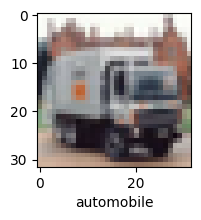

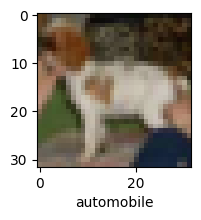

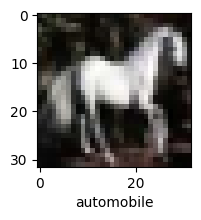

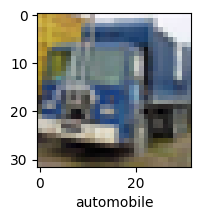

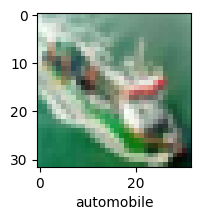

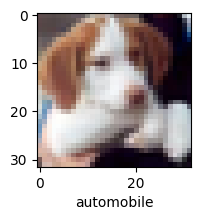

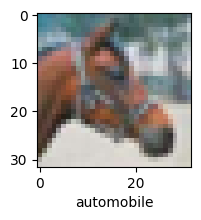

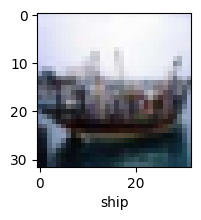

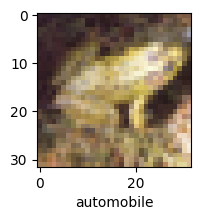

In [ ]:
for i in range(11,20):

   (plot_Images(X_test, y_pred_classes, i))

Alex _Net_Architecture

Evaluating the results of training data  using accuracy,confusion_matrix, classification report

In [ ]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = alex_net_cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
class_labels = np.unique(np.concatenate((y_test, y_pred_classes)))
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Print confusion matrix with labels
print(classes)
print("Confusion Matrix:")
print("\t" + "\t".join(str(label) for label in class_labels))
for i, row in enumerate(conf_matrix):
    print(f"{class_labels[i]}\t" + "\t".join(str(count) for count in row))






313/313 [==============================] - 2s 3ms/step
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Confusion Matrix:
	0	1	2	3	4	5	6	7	8	9
0	0	0	0	997	3	0	0	0	0	0
1	0	0	0	995	5	0	0	0	0	0
2	0	0	0	994	6	0	0	0	0	0
3	0	0	0	988	12	0	0	0	0	0
4	0	0	0	989	11	0	0	0	0	0
5	0	0	0	992	8	0	0	0	0	0
6	0	0	0	994	6	0	0	0	0	0
7	0	0	0	988	12	0	0	0	0	0
8	0	0	0	995	5	0	0	0	0	0
9	0	0	0	995	5	0	0	0	0	0


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes,target_names=classes))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.10      0.99      0.18      1000
        deer       0.15      0.01      0.02      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.03      0.10      0.02     10000
weighted avg       0.03      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Le_Net_Architecture

Evaluating the results of training data  using accuracy,confusion_matrix, classification report

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = le_net_cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
class_labels = np.unique(np.concatenate((y_test, y_pred_classes)))
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Print confusion matrix with labels
print(classes)
print("Confusion Matrix:")
print("\t" + "\t".join(str(label) for label in class_labels))
for i, row in enumerate(conf_matrix):
    print(f"{class_labels[i]}\t" + "\t".join(str(count) for count in row))






313/313 [==============================] - 1s 2ms/step
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Confusion Matrix:
	0	1	2	3	4	5	6	7	8	9
0	738	14	61	22	17	12	4	13	77	42
1	44	728	5	16	6	11	7	10	69	104
2	94	7	512	85	94	108	38	25	24	13
3	33	11	95	406	55	286	48	20	25	21
4	45	6	108	72	560	75	42	65	21	6
5	17	3	69	165	33	635	12	47	11	8
6	14	11	64	123	81	53	618	9	13	14
7	29	5	46	50	63	148	5	625	4	25
8	113	31	17	17	7	16	3	6	767	23
9	69	116	15	28	8	20	9	11	59	665


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes,target_names=classes))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.62      0.74      0.67      1000
  automobile       0.78      0.73      0.75      1000
        bird       0.52      0.51      0.51      1000
         cat       0.41      0.41      0.41      1000
        deer       0.61      0.56      0.58      1000
         dog       0.47      0.64      0.54      1000
        frog       0.79      0.62      0.69      1000
       horse       0.75      0.62      0.68      1000
        ship       0.72      0.77      0.74      1000
       truck       0.72      0.67      0.69      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



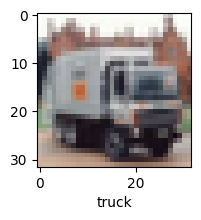

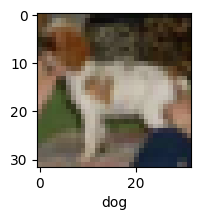

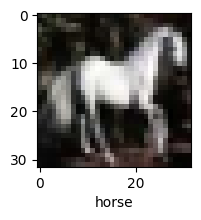

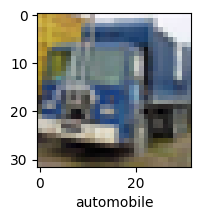

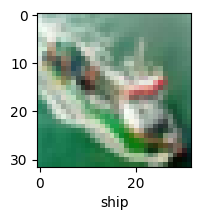

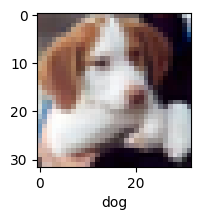

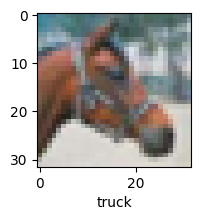

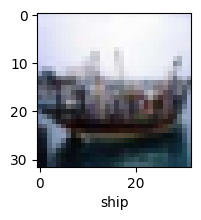

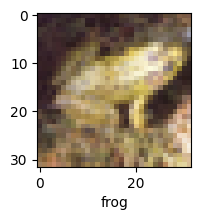

In [ ]:
for i in range(11,20):

   (plot_Images(X_test, y_pred_classes, i))